In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import os

In [2]:
dfTails = pd.read_csv('../../data/Nanopore/polyA_tails_filtered_more_than_20.csv', index_col=0)

In [3]:
outpath = '../../results/poyAtails'
os.makedirs(outpath, exist_ok=True)

In [4]:
dfTails.head()

,contig,position,leader_start,adapter_start,polya_start,transcript_start,read_rate,polya_length,qc_tag,geneID,significance,regulation,log2FoldChange,BoundInNaiveClip,ID,Avg_polyA
readname,,,,,,,,,,,,,,,,
02b380be-b2fa-4ac3-8aa1-1c83f09feffa,1,4522855,2.0,3.0,7493.0,8223.0,107.57,21.04,PASS,ENSMUSG00000002227,significant,DOWN,-2.016224,BOUND,KO_rep1,119.592576
a74f3a0d-7c5f-4881-a922-9e4eb673877a,1,4771104,2.0,3.0,7665.0,10344.0,103.86,87.34,PASS,ENSMUSG00000021748,significant,DOWN,-0.656161,BOUND,KO_rep1,110.613034
791e0c6b-334a-4a00-9352-2d1c584b1fcf,1,4894931,2.0,3.0,5340.0,7895.0,107.57,86.21,PASS,ENSMUSG00000033813,significant,DOWN,-1.709470,BOUND,KO_rep1,81.835192
c383c7b9-2ef7-4c71-8ab6-7ef4563ae6a0,1,9545417,2.0,3.0,3985.0,8751.0,111.56,171.48,PASS,ENSMUSG00000061024,significant,DOWN,-1.120703,BOUND,KO_rep1,88.545593
54f2c849-fd7c-4afd-8b95-25f9033dc9af,1,14550487,3.0,4.0,3186.0,7122.0,120.48,152.40,PASS,ENSMUSG00000035152,significant,UP,0.826065,UNBOUND,KO_rep1,125.976389


In [5]:
dfTails['Replicate'] = dfTails.ID.apply(lambda x: x.split('_')[-1])
dfTails['Condition'] = dfTails.ID.apply(lambda x: x.split('_')[0])

In [6]:
dfTails.head()

,contig,position,leader_start,adapter_start,polya_start,transcript_start,read_rate,polya_length,qc_tag,geneID,significance,regulation,log2FoldChange,BoundInNaiveClip,ID,Avg_polyA,Replicate,Condition
readname,,,,,,,,,,,,,,,,,,
02b380be-b2fa-4ac3-8aa1-1c83f09feffa,1,4522855,2.0,3.0,7493.0,8223.0,107.57,21.04,PASS,ENSMUSG00000002227,significant,DOWN,-2.016224,BOUND,KO_rep1,119.592576,rep1,KO
a74f3a0d-7c5f-4881-a922-9e4eb673877a,1,4771104,2.0,3.0,7665.0,10344.0,103.86,87.34,PASS,ENSMUSG00000021748,significant,DOWN,-0.656161,BOUND,KO_rep1,110.613034,rep1,KO
791e0c6b-334a-4a00-9352-2d1c584b1fcf,1,4894931,2.0,3.0,5340.0,7895.0,107.57,86.21,PASS,ENSMUSG00000033813,significant,DOWN,-1.709470,BOUND,KO_rep1,81.835192,rep1,KO
c383c7b9-2ef7-4c71-8ab6-7ef4563ae6a0,1,9545417,2.0,3.0,3985.0,8751.0,111.56,171.48,PASS,ENSMUSG00000061024,significant,DOWN,-1.120703,BOUND,KO_rep1,88.545593,rep1,KO
54f2c849-fd7c-4afd-8b95-25f9033dc9af,1,14550487,3.0,4.0,3186.0,7122.0,120.48,152.40,PASS,ENSMUSG00000035152,significant,UP,0.826065,UNBOUND,KO_rep1,125.976389,rep1,KO


In [7]:
# Make sure all experiments have the same genes in DOWN / CONTROL / UP population - all good
dfTails.groupby(['regulation', 'geneID']).count()['ID'].min()

4

In [8]:
len(dfTails.geneID), len(dfTails.geneID.unique())

(4728, 1182)

In [9]:
dfTails.groupby(['ID', 'regulation']).count()['geneID']

ID       regulation
KO_rep1  CONTROL       670
         DOWN          371
         UP            141
KO_rep2  CONTROL       670
         DOWN          371
         UP            141
WT_rep1  CONTROL       670
         DOWN          371
         UP            141
WT_rep2  CONTROL       670
         DOWN          371
         UP            141
Name: geneID, dtype: int64

/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

[(('DOWN', 'KO'), ('CONTROL', 'KO')), (('CONTROL', 'KO'), ('UP', 'KO')), (('DOWN', 'WT'), ('CONTROL', 'WT')), (('CONTROL', 'WT'), ('UP', 'WT'))]
rep1
DOWN_KO vs. CONTROL_KO: Mann-Whitney-Wilcoxon test two-sided, P_val:7.042e-01 U_stat=1.260e+05
CONTROL_KO vs. UP_KO: Mann-Whitney-Wilcoxon test two-sided, P_val:8.863e-01 U_stat=4.760e+04
DOWN_WT vs. CONTROL_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:8.627e-06 U_stat=1.036e+05
CONTROL_WT vs. UP_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:3.894e-02 U_stat=4.201e+04
rep2
DOWN_KO vs. CONTROL_KO: Mann-Whitney-Wilcoxon test two-sided, P_val:9.084e-01 U_stat=1.248e+05
CONTROL_KO vs. UP_KO: Mann-Whitney-Wilcoxon test two-sided, P_val:5.106e-01 U_stat=4.890e+04
DOWN_WT vs. CONTROL_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.667e-03 U_stat=1.117e+05
CONTROL_WT vs. UP_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.671e-01 U_stat=4.540e+04


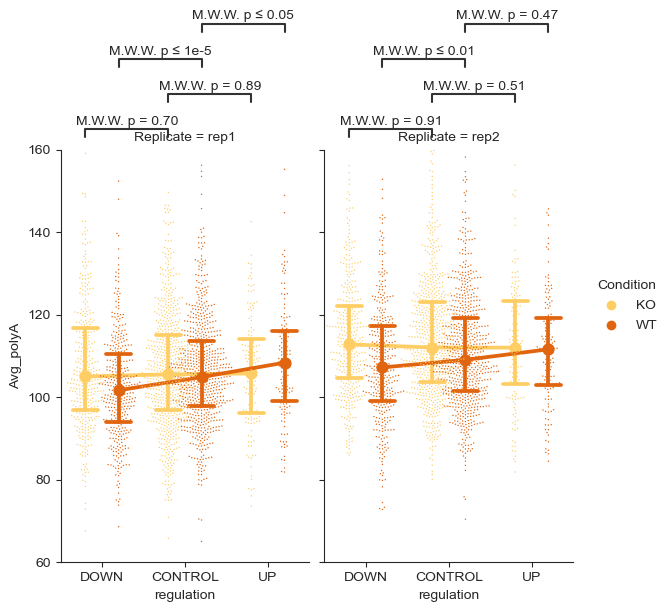

In [11]:
sns.set_style('white')

hue_order=['KO', 'WT']

g = sns.catplot(kind='swarm', data=dfTails, x='regulation', col='Replicate',
    y='Avg_polyA', hue='Condition', order=['DOWN', 'CONTROL', 'UP'], palette='YlOrBr', marker='.', dodge=True,
    size=2, aspect=.6
    )
g.map_dataframe(
    sns.pointplot, data=dfTails, x='regulation',
    y='Avg_polyA', hue='Condition', order=['DOWN', 'CONTROL', 'UP'],
    palette='YlOrBr', dodge=0.4, estimator=np.median, errorbar=('pi', 50), hue_order=hue_order,
    capsize=.3,
    )

for ax in g.fig.axes:
    ax.tick_params(left=True, bottom=True)
    ax.set_ylim(60, 160)

pairs = []
for y in hue_order:
    pairs.append((('DOWN', y),('CONTROL', y)))
    pairs.append((('CONTROL', y),('UP', y)))

print(pairs)

for id, ax in g.axes_dict.items():
    ax.tick_params(bottom=True, left=True)
    print(id)
    # subset the table otherwise the stats were calculated on the whole dataset
    annot = Annotator(
        ax, pairs, data=dfTails.loc[dfTails.Replicate==id,:], x='regulation',
        y='Avg_polyA', hue='Condition', order=['DOWN', 'CONTROL', 'UP'], hue_order=hue_order,
        )
    annot.configure(test='Mann-Whitney', text_format='simple', loc='outside')
    _, corrected_results = annot.apply_and_annotate()

g.fig.savefig(f'{outpath}/polyAtails_replicates.pdf', bbox_inches='tight')


/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

[(('DOWN', 'rep1'), ('CONTROL', 'rep1')), (('CONTROL', 'rep1'), ('UP', 'rep1')), (('DOWN', 'rep2'), ('CONTROL', 'rep2')), (('CONTROL', 'rep2'), ('UP', 'rep2'))]
KO
DOWN_rep1 vs. CONTROL_rep1: Mann-Whitney-Wilcoxon test two-sided, P_val:7.042e-01 U_stat=1.260e+05


/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


CONTROL_rep1 vs. UP_rep1: Mann-Whitney-Wilcoxon test two-sided, P_val:8.863e-01 U_stat=4.760e+04
DOWN_rep2 vs. CONTROL_rep2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.084e-01 U_stat=1.248e+05
CONTROL_rep2 vs. UP_rep2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.106e-01 U_stat=4.890e+04
WT
DOWN_rep1 vs. CONTROL_rep1: Mann-Whitney-Wilcoxon test two-sided, P_val:8.627e-06 U_stat=1.036e+05


/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categoric

CONTROL_rep1 vs. UP_rep1: Mann-Whitney-Wilcoxon test two-sided, P_val:3.894e-02 U_stat=4.201e+04
DOWN_rep2 vs. CONTROL_rep2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.667e-03 U_stat=1.117e+05
CONTROL_rep2 vs. UP_rep2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.671e-01 U_stat=4.540e+04


/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

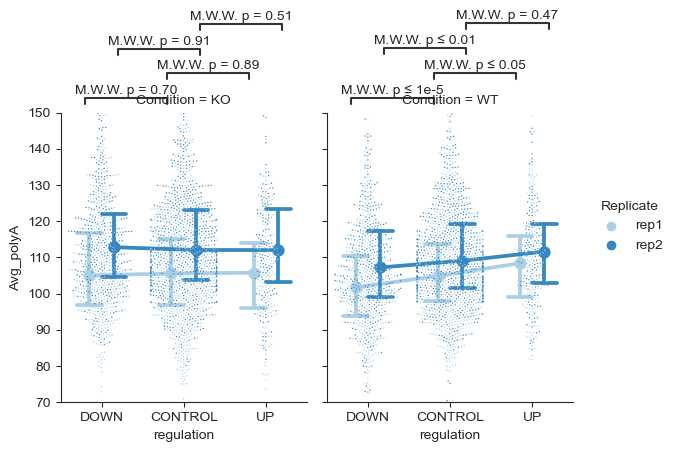

In [12]:
sns.set_style('white')


g = sns.catplot(kind='swarm', data=dfTails, x='regulation', col='Condition',
    y='Avg_polyA',order=['DOWN', 'CONTROL', 'UP'], palette='Blues', marker='.', hue='Replicate', row_order=['WT', 'KO'], hue_order=['rep1', 'rep2'],
    size=2, aspect=.6
    )

pairs = []
for y in ['rep1', 'rep2']:
    pairs.append((('DOWN', y),('CONTROL', y)))
    pairs.append((('CONTROL', y),('UP', y)))
print(pairs)

for id, ax in g.axes_dict.items():
    ax.tick_params(bottom=True, left=True)
    ax.set_ylim(70, 150)
    print(id)
    # subset the table otherwise the stats were calculated on the whole dataset
    dft = dfTails.loc[dfTails.Condition==id,:].copy()
    annot = Annotator(
        ax, pairs, data=dft, x='regulation',
        y='Avg_polyA', hue='Replicate', order=['DOWN', 'CONTROL', 'UP'], hue_order=['rep1', 'rep2'],
        )
    annot.configure(test='Mann-Whitney', text_format='simple', loc='outside')
    annot.apply_and_annotate()


g.map_dataframe(
    sns.pointplot, data=dfTails, x='regulation',
    y='Avg_polyA', order=['DOWN', 'CONTROL', 'UP'], estimator=np.median, errorbar=('pi', 50), join=True, palette='Blues', hue='Replicate', hue_order=['rep1', 'rep2'],
    capsize=.3, dodge=.3
    )


g.fig.savefig(f'{outpath}/polyAtails_replicates_separate.pdf', bbox_inches='tight')


In [13]:
dfTails['labels'] = dfTails.apply(lambda row: f'{row.regulation}_{row.Condition}', axis='columns')

In [14]:
dfTails.head()

,contig,position,leader_start,adapter_start,polya_start,transcript_start,read_rate,polya_length,qc_tag,geneID,significance,regulation,log2FoldChange,BoundInNaiveClip,ID,Avg_polyA,Replicate,Condition,labels
readname,,,,,,,,,,,,,,,,,,,
02b380be-b2fa-4ac3-8aa1-1c83f09feffa,1,4522855,2.0,3.0,7493.0,8223.0,107.57,21.04,PASS,ENSMUSG00000002227,significant,DOWN,-2.016224,BOUND,KO_rep1,119.592576,rep1,KO,DOWN_KO
a74f3a0d-7c5f-4881-a922-9e4eb673877a,1,4771104,2.0,3.0,7665.0,10344.0,103.86,87.34,PASS,ENSMUSG00000021748,significant,DOWN,-0.656161,BOUND,KO_rep1,110.613034,rep1,KO,DOWN_KO
791e0c6b-334a-4a00-9352-2d1c584b1fcf,1,4894931,2.0,3.0,5340.0,7895.0,107.57,86.21,PASS,ENSMUSG00000033813,significant,DOWN,-1.709470,BOUND,KO_rep1,81.835192,rep1,KO,DOWN_KO
c383c7b9-2ef7-4c71-8ab6-7ef4563ae6a0,1,9545417,2.0,3.0,3985.0,8751.0,111.56,171.48,PASS,ENSMUSG00000061024,significant,DOWN,-1.120703,BOUND,KO_rep1,88.545593,rep1,KO,DOWN_KO
54f2c849-fd7c-4afd-8b95-25f9033dc9af,1,14550487,3.0,4.0,3186.0,7122.0,120.48,152.40,PASS,ENSMUSG00000035152,significant,UP,0.826065,UNBOUND,KO_rep1,125.976389,rep1,KO,UP_KO


KO
0 DOWN
1 CONTROL
2 UP
{'DOWN': 0, 'CONTROL': 1, 'UP': 2}
Index(['contig', 'position', 'leader_start', 'adapter_start', 'polya_start',
       'transcript_start', 'read_rate', 'polya_length', 'qc_tag', 'geneID',
       'significance', 'regulation', 'log2FoldChange', 'BoundInNaiveClip',
       'ID', 'Avg_polyA', 'Replicate', 'Condition', 'labels'],
      dtype='object')
  Replicate  LineplotPositions   Avg_polyA
0      rep1                  0  105.040625
1      rep1                  1  105.570503
2      rep1                  2  105.765238
3      rep2                  0  112.829420
4      rep2                  1  112.066158
5      rep2                  2  112.031860
WT
0 DOWN
1 CONTROL
2 UP
{'DOWN': 0, 'CONTROL': 1, 'UP': 2}
Index(['contig', 'position', 'leader_start', 'adapter_start', 'polya_start',
       'transcript_start', 'read_rate', 'polya_length', 'qc_tag', 'geneID',
       'significance', 'regulation', 'log2FoldChange', 'BoundInNaiveClip',
       'ID', 'Avg_polyA', 'Replicate',

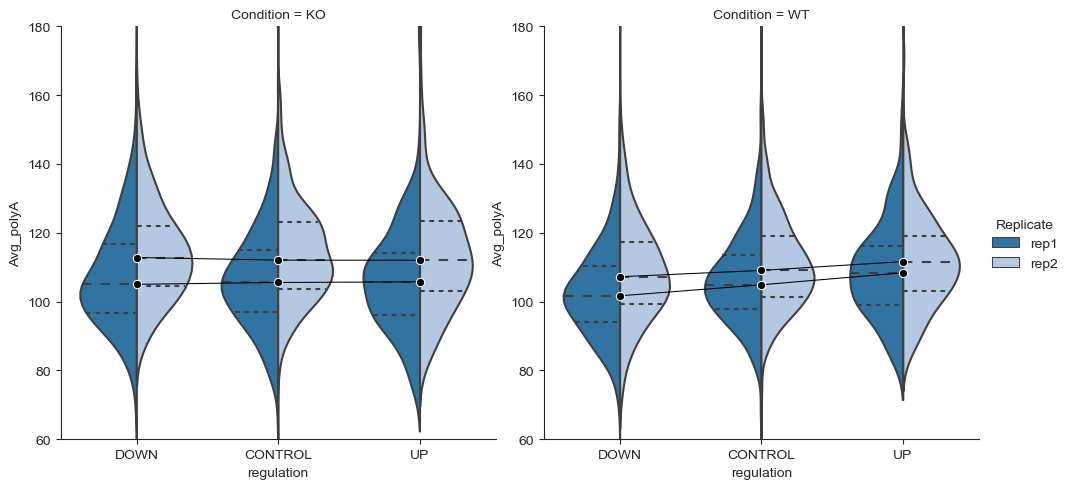

In [15]:
g = sns.catplot(kind='violin', data=dfTails, x='regulation', y='Avg_polyA', hue='Replicate', col='Condition', inner='quartile',
    order=['DOWN', 'CONTROL', 'UP'], palette='tab20', split=True, sharey=False)


for cond, ax in g.axes_dict.items():
    print(cond)
    ax.tick_params(left=True, bottom=True)
    ax.set_ylim(60, 180)
    xpositions = {}
    for i, lab in zip(ax.get_xticks(), ax.get_xticklabels()):
        print(i, lab.get_text())
        xpositions[lab.get_text()] = i
    print(xpositions)
    # Add lines
    dfPlot = dfTails.loc[dfTails.Condition==cond].copy()
    print(dfPlot.columns)
    dfPlot['LineplotPositions'] = dfPlot.regulation.map(xpositions)
    dfPlot = dfPlot.groupby(['Replicate', 'LineplotPositions']).median()['Avg_polyA'].reset_index()
    print(dfPlot)
    # dfPlot.LineplotPositions = dfPlot.LineplotPositions + 0.2
    # c = sns.color_palette('tab20', 2)
    c = ['black', 'black']
    sns.lineplot(
        data=dfPlot, hue='Replicate', x='LineplotPositions',
        y='Avg_polyA', size=8, palette=c, ax=ax, marker='o', errorbar=None, legend=False, estimator=None, **{'linewidth':3})

In [16]:
dfTails.head()

,contig,position,leader_start,adapter_start,polya_start,transcript_start,read_rate,polya_length,qc_tag,geneID,significance,regulation,log2FoldChange,BoundInNaiveClip,ID,Avg_polyA,Replicate,Condition,labels
readname,,,,,,,,,,,,,,,,,,,
02b380be-b2fa-4ac3-8aa1-1c83f09feffa,1,4522855,2.0,3.0,7493.0,8223.0,107.57,21.04,PASS,ENSMUSG00000002227,significant,DOWN,-2.016224,BOUND,KO_rep1,119.592576,rep1,KO,DOWN_KO
a74f3a0d-7c5f-4881-a922-9e4eb673877a,1,4771104,2.0,3.0,7665.0,10344.0,103.86,87.34,PASS,ENSMUSG00000021748,significant,DOWN,-0.656161,BOUND,KO_rep1,110.613034,rep1,KO,DOWN_KO
791e0c6b-334a-4a00-9352-2d1c584b1fcf,1,4894931,2.0,3.0,5340.0,7895.0,107.57,86.21,PASS,ENSMUSG00000033813,significant,DOWN,-1.709470,BOUND,KO_rep1,81.835192,rep1,KO,DOWN_KO
c383c7b9-2ef7-4c71-8ab6-7ef4563ae6a0,1,9545417,2.0,3.0,3985.0,8751.0,111.56,171.48,PASS,ENSMUSG00000061024,significant,DOWN,-1.120703,BOUND,KO_rep1,88.545593,rep1,KO,DOWN_KO
54f2c849-fd7c-4afd-8b95-25f9033dc9af,1,14550487,3.0,4.0,3186.0,7122.0,120.48,152.40,PASS,ENSMUSG00000035152,significant,UP,0.826065,UNBOUND,KO_rep1,125.976389,rep1,KO,UP_KO


[((0, 'KO'), (1, 'KO')), ((1, 'KO'), (2, 'KO')), ((0, 'WT'), (1, 'WT')), ((1, 'WT'), (2, 'WT'))]
0_KO vs. 1_KO: t-test independent samples, P_val:9.013e-01 t=1.402e-01
1_KO vs. 2_KO: t-test independent samples, P_val:9.122e-01 t=1.246e-01
0_WT vs. 1_WT: t-test independent samples, P_val:5.256e-01 t=-7.621e-01
1_WT vs. 2_WT: t-test independent samples, P_val:6.115e-01 t=-5.962e-01


/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


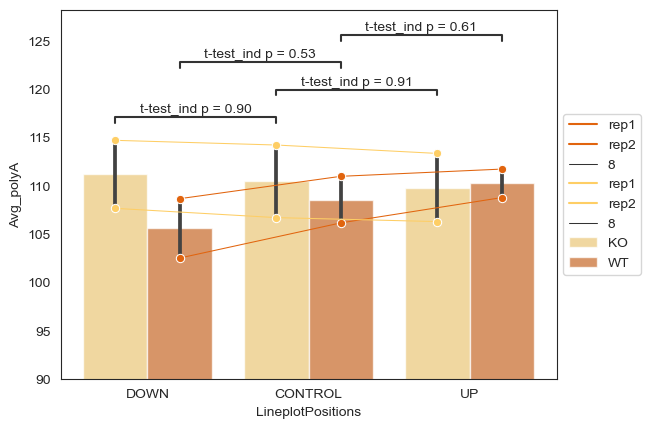

In [17]:
hue_order=['KO', 'WT']
# Plot bar
dfBar = dfTails.groupby(['Condition', 'Replicate', 'regulation']).mean()['Avg_polyA'].reset_index()
dfBar['LineplotPositions'] = dfBar.regulation.map({'DOWN': 0, 'CONTROL': 1, 'UP':2})

g = sns.barplot(
    data=dfBar, hue='Condition', x='LineplotPositions',
    y='Avg_polyA', palette='YlOrBr', dodge=0.2, estimator=np.mean, alpha=0.7, hue_order=hue_order
    )
g.set_ylim(90, 120)
# Add stats
pairs = []
for y in hue_order:
    pairs.append(((0, y),(1, y)))
    pairs.append(((1, y),(2, y)))
print(pairs)
annot = Annotator(g, pairs,
    data=dfBar, hue='Condition', x='LineplotPositions',
    y='Avg_polyA', hue_order=hue_order,
    )
annot.configure(test='t-test_ind', text_format='simple', loc='inside')
_, corrected_results = annot.apply_and_annotate()


# Add lines
dfPlot = dfBar.loc[dfBar.Condition=='WT']
dfPlot.LineplotPositions = dfPlot.LineplotPositions + 0.2
c = sns.color_palette('YlOrBr', 2)[1]
sns.lineplot(
    data=dfPlot, hue='Replicate', x='LineplotPositions',
    y='Avg_polyA', size=8, palette=[c, c], ax=g, marker='o')

dfPlot = dfBar.loc[dfBar.Condition=='KO']
dfPlot.LineplotPositions = dfPlot.LineplotPositions - 0.2
c = sns.color_palette('YlOrBr', 2)[0]
sns.lineplot(
    data=dfPlot, hue='Replicate', x='LineplotPositions',
    y='Avg_polyA', size=8, palette=[c, c], ax=g, marker='o')

g.set_xticklabels(['DOWN', 'CONTROL', 'UP'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))


1_KO vs. 1_WT: t-test independent samples, P_val:7.127e-01 t=4.242e-01
0_KO vs. 0_WT: t-test independent samples, P_val:3.540e-01 t=1.197e+00
2_KO vs. 2_WT: t-test independent samples, P_val:9.201e-01 t=-1.133e-01


/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


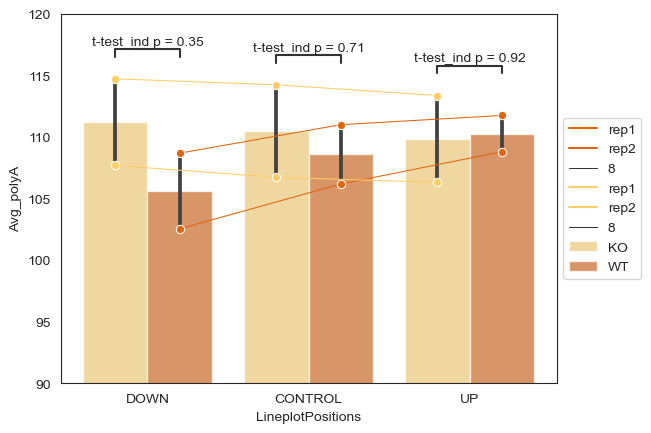

In [18]:
hue_order=['KO', 'WT']
# Plot bar
dfBar = dfTails.groupby(['Condition', 'Replicate', 'regulation']).mean()['Avg_polyA'].reset_index()
dfBar['LineplotPositions'] = dfBar.regulation.map({'DOWN': 0, 'CONTROL': 1, 'UP':2})

g = sns.barplot(
    data=dfBar, hue='Condition', x='LineplotPositions',
    y='Avg_polyA', palette='YlOrBr', dodge=0.2, estimator=np.mean, alpha=0.7, hue_order=hue_order
    )
g.set_ylim(90, 120)
# Add stats
pairs = [((0, 'KO'),(0, 'WT')), ((1, 'KO'),(1, 'WT')), ((2, 'KO'),(2, 'WT'))]

annot = Annotator(g, pairs,
    data=dfBar, hue='Condition', x='LineplotPositions',
    y='Avg_polyA', hue_order=hue_order,
    )
annot.configure(test='t-test_ind', text_format='simple', loc='inside')
annot.apply_and_annotate()



dfPlot = dfBar.loc[dfBar.Condition=='WT']
dfPlot.LineplotPositions = dfPlot.LineplotPositions + 0.2
c = sns.color_palette('YlOrBr', 2)[1]
sns.lineplot(
    data=dfPlot, hue='Replicate', x='LineplotPositions',
    y='Avg_polyA', size=8, palette=[c, c], ax=g, marker='o')

dfPlot = dfBar.loc[dfBar.Condition=='KO']
dfPlot.LineplotPositions = dfPlot.LineplotPositions - 0.2
c = sns.color_palette('YlOrBr', 2)[0]
sns.lineplot(
    data=dfPlot, hue='Replicate', x='LineplotPositions',
    y='Avg_polyA', size=8, palette=[c, c], ax=g, marker='o')

g.set_xticklabels(['DOWN', 'CONTROL', 'UP'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))